## Messages Reduce and Filtering

In [24]:
from langchain_groq import ChatGroq
from dotenv import load_dotenv
import os
load_dotenv()

os.environ["GORQ_API_KEY"] = os.getenv("GROQ_API_KEY")

llm = ChatGroq(model="meta-llama/llama-4-scout-17b-16e-instruct")

## **Messages Reducer**

In [25]:
from pprint import pprint
from langchain_core.messages import AIMessage, HumanMessage
messages = [AIMessage(content="Hi sir, how can i help you?")]
messages.append(HumanMessage(content="i'm good can you help me to solve this math x^2+5x+6=0 step by step in markdown format?"))

for m in messages:
    m.pretty_print()

================================== Ai Message ==================================

Hi sir, how can i help you?
================================ Human Message =================================

i'm good can you help me to solve this math x^2+5x+6=0 step by step in markdown format?


In [26]:
response = llm.invoke(messages)

In [27]:
from IPython.display import display, Markdown
messages.append(response)
for m in messages:
    Markdown(m.pretty_print())

================================== Ai Message ==================================

Hi sir, how can i help you?
================================ Human Message =================================

i'm good can you help me to solve this math x^2+5x+6=0 step by step in markdown format?
================================== Ai Message ==================================

## Solving the Quadratic Equation
### Step 1: Write Down the Given Equation

The given quadratic equation is:
```markdown
x^2 + 5x + 6 = 0
```

### Step 2: Factor the Quadratic Equation (if possible)

We can try to factor the quadratic equation:
```markdown
x^2 + 5x + 6 = (x + 3)(x + 2) = 0
```

### Step 3: Apply the Zero Product Property

According to the zero product property, if `ab = 0`, then `a = 0` or `b = 0`. Applying this to our factored equation:
```markdown
(x + 3) = 0 or (x + 2) = 0
```

### Step 4: Solve for x

Now, solve each equation for `x`:
```markdown
x + 3 = 0 --> x = -3
x + 2 = 0 --> x = -2
```

### Step 5: Writ

In [28]:
Markdown(response.content)

## Solving the Quadratic Equation
### Step 1: Write Down the Given Equation

The given quadratic equation is:
```markdown
x^2 + 5x + 6 = 0
```

### Step 2: Factor the Quadratic Equation (if possible)

We can try to factor the quadratic equation:
```markdown
x^2 + 5x + 6 = (x + 3)(x + 2) = 0
```

### Step 3: Apply the Zero Product Property

According to the zero product property, if `ab = 0`, then `a = 0` or `b = 0`. Applying this to our factored equation:
```markdown
(x + 3) = 0 or (x + 2) = 0
```

### Step 4: Solve for x

Now, solve each equation for `x`:
```markdown
x + 3 = 0 --> x = -3
x + 2 = 0 --> x = -2
```

### Step 5: Write Down the Solutions

The solutions to the equation `x^2 + 5x + 6 = 0` are:
```markdown
x = -3 or x = -2
```

## Final Answer

The final solutions are `x = -3` and `x = -2`. 

You can verify these solutions by plugging them back into the original equation. 

### Verification

- For `x = -3`:
```markdown
(-3)^2 + 5(-3) + 6 = 9 - 15 + 6 = 0
```

- For `x = -2`:
```markdown
(-2)^2 + 5(-2) + 6 = 4 - 10 + 6 = 0
```

Both solutions satisfy the original equation.

## Using RemoveMessages to reducer the messages.

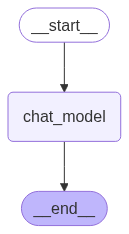

In [29]:
from IPython.display import Image, display
from langgraph.graph import MessagesState
from langgraph.graph import StateGraph, START, END

# Node
def chat_model_node(state: MessagesState):
    return {"messages": llm.invoke(state["messages"])}

# Build graph
builder = StateGraph(MessagesState)
builder.add_node("chat_model", chat_model_node)
builder.add_edge(START, "chat_model")
builder.add_edge("chat_model", END)
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [30]:
response = graph.invoke(
    {
        "messages": messages
    }
)

for m in response['messages']:
    m.pretty_print()

================================== Ai Message ==================================

Hi sir, how can i help you?
================================ Human Message =================================

i'm good can you help me to solve this math x^2+5x+6=0 step by step in markdown format?
================================== Ai Message ==================================

## Solving the Quadratic Equation
### Step 1: Write Down the Given Equation

The given quadratic equation is:
```markdown
x^2 + 5x + 6 = 0
```

### Step 2: Factor the Quadratic Equation (if possible)

We can try to factor the quadratic equation:
```markdown
x^2 + 5x + 6 = (x + 3)(x + 2) = 0
```

### Step 3: Apply the Zero Product Property

According to the zero product property, if `ab = 0`, then `a = 0` or `b = 0`. Applying this to our factored equation:
```markdown
(x + 3) = 0 or (x + 2) = 0
```

### Step 4: Solve for x

Now, solve each equation for `x`:
```markdown
x + 3 = 0 --> x = -3
x + 2 = 0 --> x = -2
```

### Step 5: Writ

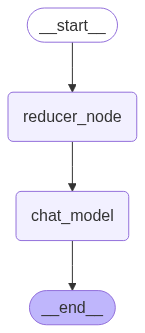

In [31]:
from IPython.display import Image, display
from langgraph.graph import MessagesState
from langgraph.graph import StateGraph, START, END
from langchain_core.messages import RemoveMessage

## reducer node

def reducer_node(state: MessagesState):
    """This function is responsible for reduce the messages"""
    
    delete_messages = [RemoveMessage(id=m.id) for m in state["messages"][: -2]]
    return {
        "messages": delete_messages
    }

# Node
def chat_model_node(state: MessagesState):
    return {"messages": llm.invoke(state["messages"])}

# Build graph
builder = StateGraph(MessagesState)
builder.add_node("chat_model", chat_model_node)
builder.add_node("reducer_node", reducer_node)

builder.add_edge(START, "reducer_node")
builder.add_edge("reducer_node", "chat_model")
builder.add_edge("chat_model", END)
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [32]:
# Message list with a preamble
messages = [AIMessage("Hi.", name="Bot", id="1")]
messages.append(HumanMessage("Hi.", name="alamin", id="2"))
messages.append(AIMessage("So you said you were researching ocean mammals?", name="Bot", id="3"))
messages.append(HumanMessage("Yes, I know about whales. But what others should I learn about?", name="alamin", id="4"))

# Invoke
output = graph.invoke({'messages': messages})
for m in output['messages']:
    m.pretty_print()

================================== Ai Message ==================================
Name: Bot

So you said you were researching ocean mammals?
================================ Human Message =================================
Name: alamin

Yes, I know about whales. But what others should I learn about?
================================== Ai Message ==================================

Whales are indeed fascinating creatures. Besides whales, there are many other interesting ocean mammals to learn about. Here are some examples:

1. **Dolphins**: Like whales, dolphins are cetaceans, but they're smaller and more agile. There are 40 species of dolphins, ranging from the bottlenose dolphin to the orca (also known as the killer whale, which is actually a dolphin, not a whale!).
2. **Seals and Sea Lions**: These fin-footed mammals are found in oceans worldwide. Seals have ear holes, while sea lions have external ear flaps. They're known for their playful and curious nature.
3. **Walruses**: With thei

## Filter Messages

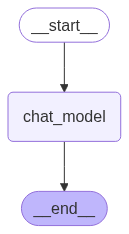

In [33]:
# Node
def chat_model_node(state: MessagesState):
    return {"messages": [llm.invoke(state["messages"][-1:])]}

# Build graph
builder = StateGraph(MessagesState)
builder.add_node("chat_model", chat_model_node)
builder.add_edge(START, "chat_model")
builder.add_edge("chat_model", END)
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [34]:
messages.append(output['messages'][-1])
messages.append(HumanMessage(f"Tell me more about Narwhals!", name="Alamin"))

In [35]:
for m in messages:
    m.pretty_print()

================================== Ai Message ==================================
Name: Bot

Hi.
================================ Human Message =================================
Name: alamin

Hi.
================================== Ai Message ==================================
Name: Bot

So you said you were researching ocean mammals?
================================ Human Message =================================
Name: alamin

Yes, I know about whales. But what others should I learn about?
================================== Ai Message ==================================

Whales are indeed fascinating creatures. Besides whales, there are many other interesting ocean mammals to learn about. Here are some examples:

1. **Dolphins**: Like whales, dolphins are cetaceans, but they're smaller and more agile. There are 40 species of dolphins, ranging from the bottlenose dolphin to the orca (also known as the killer whale, which is actually a dolphin, not a whale!).
2. **Seals and Sea Lions**: Th

In [36]:
# Invoke, using message filtering
output = graph.invoke({'messages': messages})
for m in output['messages']:
    m.pretty_print()

================================== Ai Message ==================================
Name: Bot

Hi.
================================ Human Message =================================
Name: alamin

Hi.
================================== Ai Message ==================================
Name: Bot

So you said you were researching ocean mammals?
================================ Human Message =================================
Name: alamin

Yes, I know about whales. But what others should I learn about?
================================== Ai Message ==================================

Whales are indeed fascinating creatures. Besides whales, there are many other interesting ocean mammals to learn about. Here are some examples:

1. **Dolphins**: Like whales, dolphins are cetaceans, but they're smaller and more agile. There are 40 species of dolphins, ranging from the bottlenose dolphin to the orca (also known as the killer whale, which is actually a dolphin, not a whale!).
2. **Seals and Sea Lions**: Th